# Final Project - Explainer Notebook
### Social Graphs and Interactions 2019

## Introduction

This project is conducted in the course 02805 Social graphs.

It is the final project, as a small data study conducted over 4 weeks.

Delivered: 11-12-2019

In [18]:
from IPython.display import HTML
# Youtube
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/58HRrNMqzYM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

## Table of contents

- 0. Data-set
- 1. motivation
- 2. Basic statistics
- 3. Tools, theory and analysis
- 4. Initialization
- 5. Scraping
    - 5.1 custom API class
    - 5.2 Other functions for extracting data
    - 5.3 Download network of nodes
    - 5.4 Downloading posts and comments
- 6. Analysis step 1 - network analysis
- 7. Sentiment analysis
    - 7.1 clean- sentiment- and plotting Functions
    - 7.2 workspace
    - 7.3 Distribution plot
    - 7.4 Doggo Score
    - 7.5 Doggo score evaluation
    - 7.6 Sentiment evaluation
- 8. Discussion
    - 8.1 what went well
    - 8.2 what is still missing
    - 8.3 What could be improved?, Why?
- 9. list of contributions


### 0. Data-set
All needed documents can be downloaded from:
https://drive.google.com/open?id=1QOZeMaIrv9ZNVzRU3q-mGBvRb9AwV3xp
Observable Notebooks
https://observablehq.com/@mfalkb/dogsofinstagram-will-pics-of-dogs-make-you-happy/2?fbclid=IwAR1A2L2csJxfPm9qOGZ16q-1nNRVNNVQzKTBwDaE9bXMHEQMVyz2OqmvBjg



### 1. Motivation

In this project we wish to uncover if images of dogs on social media generally make users react more positively than any other content. **Instagram** is a social media platform, where users mainly share images and videos, and comment on each others posts. 


- **What is your dataset?** (some is repeated from web)

Our starting point is the instagram profile *@dogsofinstagram*. This profile is the largest profile, which exclusively post images of dogs, on instagram, when based on followers. The profile has 4.6 million followers and follows 128 other instagram profiles. We have done some research and observe that the profiles @dogsofinstagram follows, also majorily posts images of dogs. Our hypothesis is, that as we move further away from @dogsofinstagram, the profiles will post images of more diverse content, which will be reflected in the generel sentiment of the comments posted to their images.

Our dataset consist of **319 instagram users** with up to **15 posts for each user**, all totalling **3563 posts**. Each of these has a individual number of comments. After the cleaning process we are left with **24363 comments** for the analysis.


- **Why did you choose this/these particular dataset(s)?**

The dataset we created was selected to accommodate our hypothesis of how sentiment in statements are correlated to dogs on instagram. The dataset could have been constructed in many ways, but we used snowballing, as it ensured that we had a viable path for building the network. 

Instagram is a suitable source of data, because it allows us to analyse written content in relation to images. To be more specific, we will in this project, perform a sentiment analysis of the comments posted to images of dogs and images of more diverse content, and compare the results.

In general, as you can read in the discussion, instagram is not very friendly in terms of API, as it has no official API. This became an unforeseen challenge that we faced and dealt with. Hindsight a fora such as reddit might have been easier. 

The assignment is centered around the nltk work we do and NetworkX is used supplementary to the analysis. 


- **What was your goal for the end user's experience?**

The user goal of the assignment is to create an observable webpage that is transparent and easy to dive into. We introduce the case, a few catchy pictures and then we introduce, in simple language, our focus and how we approached it. Every graph of media is commented and clarified. Finally we conclude. And at the very bottom the user can access the data that we scraped from instagram. 

On user experience, we apply the network graph to let the user interact with our dataset in its network format. 

### 2. Basic statistics
- **Write about your choices in data cleaning and preprocessing**

**Data-scraping/API**
We used InstagramAPI from github.com/LevPasha/Instagram-API-python to connect to the instagram api. This required sign in but allowed us to send api requests to instagram and recieve data in form of JSON. The api is unofficial and instagram does not have an official api to scrape the data we needed, so we had to make due with the unofficial api. 

**Hash sampling**
To sample the users we used murmur3 hashing which returns almost uniformly distributed integers. If this integer was divisible with 5, then we would include it, resulting in about 20% of the users being included. This method of sampling were used, since we then in later requests could be absolutely sure that it would be the same usernames that would be included every time, and not a new random set of usernames.

**Cleaning process** 

'For the network analysis'

- We excluded external edges, and thus cut the network to a workable size. 

- As mentioned above we downloaded 20% of the network, mainly due to download limitations set by instagram, causing high scraping time. 

For the sentiment analysis we did a number of steps

- We removed apostrophe's, links and other non-relevant signs such as emojis. 

- We cleared all "Null"-value comments and posts with no comments

- Detected language, specifically removed comments detected as german. We did this as the language detecter is not that good on small comments, as are most comments on instagram. For instance it would frequently read english as norwegian or dutch.

- Removed stop words


- **Write a short section that discusses the dataset stats**

The data downloaded were exclusively in JSON format and were directly injected into NetworkX and saved as edgelists to the local drive. 
Comments and posts were downloaded, modified and saved in JSON format.

316 nodes and 860 edges = 29KB \
Nodes took several hours to scrape due to implemented waiting time.

Posts from 316 users = 1MB \
Posts took about 1 hour to scrape due to implemented waiting time.

Comments from 3.563 posts = 2.1MB \
The comments took about 10 hours to scrape due to implemented waiting time.


The set is relatively small and they were and have taken a long time to retrieve due to api limitations. It is 20% of the full network. Thus the network is incomplete. This creates certain limitations in terms of applying measurements on the network. The comments are in general short, full of emijis and instagram_slang, with little depth in terms of meaning, but rather a lot of emotionel spurs such as "Cute", "awesome" etc. The fact that instagram is loaded with positivity might make the nltk analysis harder as it might have a harder time diferentiating if dogs actually make people respond more positively in sentiment.  

### 3. Tools, theory and analysis

**Tools Utilized**
- Data collection
    - InstagramAPI
    - HTTP
    - JSON
    - Murmur3 Hashing

- Network
    - Shortest path
    - Degree
    
- Sentiment
    - Distribution plot
    - Scatter Plot
    - Tokonization
    - Regex
    - Stop-words
    - Language Detect
    - Term Frequency
    - Inverse Document Frequency
    - Sentiment Value
    - WordCloud
    
    
"NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum." - https://www.nltk.org

We use NLTK, to assess the sentiment of the comments in section 7.

**aproach**

We use network theory to assess and understand the network.

### 4. Initializing

In [1]:
#part 5 - Scraping
from InstagramAPI import InstagramAPI
import requests
import urllib.request
import json
import networkx as nx
import time
import mmh3
from pathlib import Path

#part 7 - Sentiment analysis
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from PIL import Image
from wordcloud import WordCloud
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
stop_words = set(nltk.corpus.stopwords.words('english')) 
import seaborn as sns
from scipy import stats
import math

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from langdetect import detect

Fail to import moviepy. Need only for Video upload.


### 5 Scraping
#### 5.1 Custom API class

**To access the instagram API we created a custom API class to use utilize the InstagramAPI with alternating logins**

When sending an api request through InstagramAPI, they return a json response which which we can unpack and save in a format we can use locally and discard all the other information. The json response can have information about user settings, posts and comments depending on which api request is sent. Some api requests only return a limited number of entries. To gather more entries a new api request would have to be sent.

In [2]:
class API:
    '''initialize'''
    def __init__(self, w=10):
        self.count=0
        self.w=w
        self.lst=[]
    
    '''add login for api requests'''
    def add_login(self, username, password="REDACTED"):
        self.lst.append(InstagramAPI(username, password))
        self.lst[-1].login()
        time.sleep(self.w)
        self.l=len(self.lst)
            
    '''get username for all followed by account'''
    def get_all_following(self, userid):
        nextid = True
        following=[]
        while nextid:
            self.lst[self.count%self.l].getUserFollowings(userid, maxid=nextid)
            feed = self.lst[self.count%self.l].LastJson
            for i in range(len(feed['users'])):
                if not mmh3.hash(feed['users'][i]['username'], seed=16) % 5:
                    if not feed['users'][i]['is_private']:
                        if feed['users'][i]['username'] not in following:
                            following.append(feed['users'][i]['username'])
            try:
                nextid=feed['next_max_id']
            except:
                nextid=None
                
            if nextid:
                time.sleep(self.w)
            self.count+=1
        return following
    
    '''Get followed and follower count from username with api request'''
    def getfollowingnumber(self, userid):
        self.lst[self.count%self.l].getUsernameInfo(userid)
        feed = api.lst[self.count%self.l].LastJson
        self.count+=1
        time.sleep(self.w/2)
        return feed['user']['following_count']

    '''download mediaID and caption from post history and save to drive'''
    def get_content(self, userid, path):
        content = {}
        self.lst[self.count%self.l].getUserFeed(userid)
        feed = self.lst[self.count%self.l].LastJson
        self.count+=1
        for i in range(len(feed['items'])):
            content[feed['items'][i]["caption"]['media_id']] = feed['items'][i]['caption']['text']
        json.dump(content, open(path,'w'))
        
    '''download usernames and comments from mediaID and save to drive'''
    def get_comments(self, mediaid, path):
        comments = {}
        self.lst[self.count%self.l].getMediaComments(str(mediaid))
        feed = self.lst[self.count%self.l].LastJson
        self.count+=1
        for i in range(len(feed['comments'])):
            comments[feed['comments'][i]['user']['username']] = feed['comments'][i]['text']
        json.dump(comments, open(path,'w'))

#### 5.2 Other functions for extracting data
**Increase(network) is used to take all nodes with an out degree of 0 and find and add nodes and edge to followees**

**Close(network) is used to take all nodes with an out degree of 0 and find edge to followees already in the network**

In [3]:
'''Get followed and follower count from username without api request'''
def get_info(username):
    url = "https://www.instagram.com/"+ username +"/?__a=1"
    response = requests.get(url)
    respJSON = response.json()
    try:
        return respJSON['graphql']['user']['edge_follow']['count']
    except:
        return "could not find userID"

'''Get userID from username without api request'''
def get_id(username):
    url = "https://www.instagram.com/web/search/topsearch/?query="+username+"&count=1"
    response = requests.get(url)
    respJSON = response.json()
    try:
        user_id = str(respJSON['users'][0].get("user").get("pk"))
        return user_id
    except:
        return "could not find userID"
    
    
'''increase network with 1 length'''
def increase(N, save=None):
    for node in list(N.nodes()):
        if not N.out_degree(node):
            tmplst = api.get_all_following(get_id(node))
            for tmp in tmplst:
                if tmp not in usr_flw.keys():
                    usr_flw[tmp] = api.getfollowingnumber(get_id(tmp))
                if usr_flw[tmp] > 190:
                    print(tmp+" have over 190 follows... IGNORED")
                else:
                    print('adding edge' + tmp)
                    N.add_edge(node, tmp)
            if save:
                print("saved to " + save, time.asctime(time.localtime(time.time())))
                nx.write_edgelist(N, save)
                json.dump(usr_flw, open("usr_flw.txt",'w'))
    return N

'''close network so all nodes without outgoing connections are checked to see if they follow any inside the network'''
def close(N, save=None):
    for node in list(N.nodes()):
        if not N.out_degree(node):     
            tmplst = api.get_all_following(get_id(node))
            for tmp in tmplst:
                if tmp in N.nodes():
                    print('adding edge ' + tmp)
                    N.add_edge(node, tmp)
            if save:
                print("saved to " + save, time.asctime(time.localtime(time.time())))
                nx.write_edgelist(N, save)
    return N

#### 5.3 Download network of nodes

**Adding an arbitrary amount of instagram logins**

In [7]:
#All users are logged into different sessions in a list
api=API()
api.add_login("02805apitest")
api.add_login("02805apitest2")
api.add_login("02805apitest3")
api.add_login("02805apitest4")
api.add_login("02805apitest5")
api.add_login("02805apitest6")
api.add_login("02805apitest7")
api.add_login("02805apitest8")
api.add_login("02805apitest9")

**The network is initialized and the first node is added. Then the increase function is used several times**

In [8]:
#DiGraph is created and first node is added. 
G = nx.DiGraph()
G.add_node('dogsofinstagram')

#Network is increased 5 times and then closed.
G = increase(G, save="data/n_1_sample.edgelist")
G = increase(G, save="data/n_2_sample.edgelist")
G = increase(G, save="data/n_3_sample.edgelist")
G = increase(G, save="data/n_4_sample.edgelist")
G = increase(G, save="data/n_5_sample.edgelist")
G = close(G, save="data/n_5_sample_closed.edgelist")

#### 5.4 Downloading posts and comments
**For each node in the network, it should gather the latest posts and save media_id and caption to a file.**
**Gather comments does the same, but for all comments in the posts listed in the previously made files**

In [4]:
'''for all users in network, gather content through api'''
def gather_content(N):
    for node in list(N.nodes()):
        path='data/comments/'+node+'_content.txt'
        if not Path(path).is_file():
            print('adding', node)
            try:
                api.get_content(get_id(node), path)
            except:
                json.dump({False: None}, open(path,'w'))
        else:
            print(node, 'already added')
        time.sleep(5)

        
'''for all users in network, gather comments from media id through api'''
def gather_comments(N):
        for node in list(N.nodes()):
            d = json.load(open('data/comments/'+node+'_content.txt'))
            for i in list(d.keys()):
                path='data/comments/comments/'+ i +'_comments.txt'
                if not Path(path).is_file():
                    print('adding', i)
                    try:
                        api.get_comments(i, path)
                        time.sleep(5)
                    except:
                        json.dump({False: None}, open(path,'w'))
                else:
                    print(i, 'already added')

In [5]:
#Network is created from file and posts and comments are downloaded for each node. 
G = nx.read_edgelist("data/n_5_sample_closed.edgelist",create_using=nx.DiGraph)
gather_content(G)
gather_comments(G)

### 6 Analysis step 1 - network analysis
In this step we will apply some basic graph theory on our network of instagram profiles. We created the graph, both directed and undirected in order to count the number of links between the nodes in the graph. The 'shortest' path method was applied, in order to group the nodes based on their distance to our central node 'dogsofinstagram'. Links between layers and internally in layers were counted. Lastly the network was visualised with node color based on distance to 'dogsofinstagram'.

**First we create a directed and undirected graph using networkx on the data we extracted from instagram:**

In [4]:
diG = nx.read_edgelist("data/n_5_sample_closed.edgelist",create_using=nx.DiGraph)
G = nx.read_edgelist("data/n_5_sample_closed.edgelist",create_using=nx.Graph)

**The number of instagram users in our network corresponds to the number of nodes, which is:**

In [107]:
print('Number of nodes:',len(G.nodes()))

Number of nodes: 316


**Lets detect the number of links between nodes in both graphs:**

In [100]:
print('Number of edges in:')
print('- Undirected graph:',len(G.edges()))
print('- Directed graph:',len(diG.edges()))

Number of edges in:
- Undirected graph: 643
- Directed graph: 860


**In the directed graph we see a higher number of links between the nodes, because both links in each direction are counted. We see a difference of 217 links, which means we have a mutual connection between the nodes in the network, 217 times.**

**We use the 'shortest path' method to compute the distance from each node to the node 'dogsofinstagram':**

In [9]:
# Count shortest path to central node ('dogsofinstagram')
path = nx.single_source_shortest_path(G, 'dogsofinstagram')
layer_count = {}

# Count number of nodes in each layer/distance
for key in path.keys():
    layer = len(path[key])-1
    if layer in layer_count.keys():
        layer_count[layer] += 1
    else:
        layer_count[layer] = 1
    
print('Layer \t Node count')   
for layer in layer_count.keys():
    print(layer,'\t',layer_count[layer])
    
#In total 316 Nodes

Layer 	 Node count
0 	 1
1 	 5
2 	 9
3 	 30
4 	 191
5 	 80


**'Layer' corresponds the 'shortest path' to 'dogsofinstagram' minus 1. We use this terminology in order to group the nodes according to their distance to 'dogsofinstagram', which we regard as the center of the network. It can be seen that the amount of nodes in each layer increases rapidly until layer 4 and then drops in layer 5, which is due to our sampling method.**

**We can count the number of edges between the layers and internally in each layer:**

In [102]:
# Initialize links count in layer 
layer0to1, layer1to2, layer2to3, layer3to4, layer4to5 = 0,0,0,0,0
layer1to1, layer2to2, layer3to3, layer4to4, layer5to5 = 0,0,0,0,0

# Count number of links in and between layers
for edge in G.edges():    
    layer1 = len(path[edge[0]])-1
    layer2 = len(path[edge[1]])-1
    if layer1 == 0 and layer2 == 1 or layer2 == 0 and layer1 == 1:
        layer0to1 += 1
    if layer1 == 1 and layer2 == 1:
        layer1to1 += 1
    if layer1 == 1 and layer2 == 2 or layer2 == 1 and layer1 == 2:
        layer1to2 += 1
    if layer1 == 2 and layer2 == 2:
        layer2to2 += 1
    if layer1 == 2 and layer2 == 3 or layer2 == 2 and layer1 == 3:
        layer2to3 += 1
    if layer1 == 3 and layer2 == 3:
        layer3to3 += 1
    if layer1 == 3 and layer2 == 4 or layer2 == 3 and layer1 == 4:
        layer3to4 += 1
    if layer1 == 4 and layer2 == 4:
        layer4to4 += 1
    if layer1 == 4 and layer2 == 5 or layer2 == 4 and layer1 == 5:
        layer4to5 += 1
    if layer1 == 5 and layer2 == 5:
        layer5to5 += 1
        
print('Number of links between layers:')    
print('0 to 1:',layer0to1)    
print('1 to 2:',layer1to2)    
print('2 to 3:',layer2to3)    
print('3 to 4:',layer3to4)    
print('4 to 5:',layer4to5)    

print('\nNumber of links in layer:')    
print('1 to 1:',layer1to1)    
print('2 to 2:',layer2to2)
print('3 to 3:',layer3to3)  
print('4 to 4:',layer4to4)  
print('5 to 5:',layer5to5)  

# In total 643 of links

Number of links between layers:
0 to 1: 5
1 to 2: 9
2 to 3: 31
3 to 4: 234
4 to 5: 105

Number of links in layer:
1 to 1: 2
2 to 2: 1
3 to 3: 10
4 to 4: 229
5 to 5: 17


**Next, we will plot the undirected graph. In order for us to better distingush between which layer each node belongs to in the network, we color them according to their distance to 'dogsofinstagram'.**

In [10]:
# Creating colormap of node colors
color_map = []
table = str.maketrans({'0':'red','1':'yellow','2':'purple','3':'blue','4':'green','5':'grey'})
for node in G.nodes():    
    color = str(len(path[node])-1).translate(table)
    color_map.append(color)

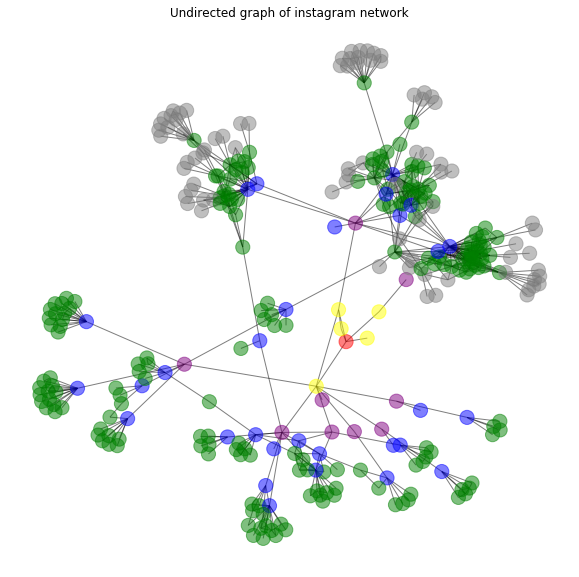

In [21]:
# Plotting undirected graph
plt.figure(figsize = (10, 10))
plt.title('Undirected graph of instagram network')
nx.draw_networkx(G, alpha = 0.5, node_size = 200, node_color = color_map, with_labels = False)
plt.axis('off')
plt.show()

**The central node correponding to 'dogsofinstagram' is colored in red.**

**Besides this we have:**
* Layer 1: yellow
* Layer 2: purple
* Layer 3: blue
* Layer 4: green
* Layer 5: grey

**We observe several clusters of leafs in the outer layers of the network (4 and 5). This is due to a smaller subset of the nodes in layer 4 linking to all the remaining nodes in layer 5.** 

**It is important to remember that our network is a product of a sampling process and therefore only represents parts of a real network. Because of this, we have choosen not to do any centrality measures of the network, as these would be higly biased by the sampling process.**

### 7 Sentiment analysis

First we clean the comments from languages we cant process such as german. We load the data and clean it for other signs we cant process and stop words. The we group them by layers and create a histogram om the layers. Additionally we assign a score "doggy"score that assess a users dog posting. We uphold Doggyscore vs user sentiment and see if dogposting has a relation to the sentiment in the comments. We establish that as we go further away from our snowballing starting point, it becomes less dog related, pairing layers vs dogscore. Finally we run wordclouds using TF, but found that IDF was obstructing the purpose.

#### 7.1 Clean- sentiment- and plotting functions

In [6]:
def clean(txt): #Remove punctuation, numbers, etc.. and return lowered text
    #remove to connect words
    txt=txt.replace("’","")
    #Twitterhandle and retweets
    txt = txt.replace('RT','')
    txt = re.sub('@[^\s]+','',txt)
    #links
    txt = re.sub(r'https?:\/\/.*[\r\n]*', '', txt, flags=re.MULTILINE)
    #only keep lowercase letters
    txt = re.sub('[^a-z]+', ' ', txt.lower())
    return txt

def sentiment(comment):
    Sum=[]   
    #tokenize and iterate
    for word in word_tokenize(clean(comment)): 
        try:
            Sum.append(float(mt['happiness_average'][word]))
        except:
            pass
    return sum(Sum)/len(Sum) 

def createCloud(freq, text = ''): #function to plot wordcloud    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=6000,height=2000, max_words=50,relative_scaling=0.5,\
                          normalize_plurals=False).generate_from_frequencies(freq)
    # Display the generated image:
    plt.figure( figsize=(22,5))
    plt.axis("off")
    plt.imshow(wordcloud)
    
#Does two things 2) returns sentiment B) Returns List of comments
def sentiment_comments(N, return_list = False, segment = False):
        dic = {}
        l2 = []
        l3 = []
        for node in list(N.nodes()):
            d = json.load(open('data/comments/'+node+'_content.txt'))
            l = []
            for i in list(d.keys()):
                path='data/comments/comments/'+ i +'_comments.txt'
                if Path(path).is_file():
                    p = json.load(open('data/comments/comments/'+ i +'_comments.txt'))
                    for j in list(p.keys()):
                        if p[j]:
                            try:
                                if not detect(p[j]) == 'de':
                                    if return_list:
                                        l2.append(clean(p[j])) 
                                    else:
                                        l.append(sentiment(p[j]))     
                            except:
                                pass
            if not return_list: #average to sentiment analysis                   
                if len(l):         
                    dic[node]=sum(l)/len(l)
            if segment:       #segments or lists
                dic[node] = l2
                l2 = []
        #returns sentiment with user keys
        if not return_list:  
            return dic
        #returns dictionary of comments with user keys
        if segment:  
            return dic
        #returns list of comments. 
        return l2

**Sentiment for words is added:**

In [7]:
#Importing the happiness ranking
LabMT = pd.read_csv('data/Data_set_S1.txt', sep='\t')
LabMT.set_index("word", drop=True, inplace=True)

#for computational reasons we make a dictionary from the data.
mt = LabMT.to_dict() 

# initialization data
G = nx.read_edgelist("data/n_5_sample_closed.edgelist",create_using=nx.DiGraph)

**Sentiment for all comments is measured:**

In [8]:
sentiment_dic = sentiment_comments(G)

**Layers are added and matched with the sentiment of users:**

In [11]:
layers = json.load(open("data/g1_dict.txt"))
layers['layers']


sentiment_layer={}
for key in layers['layers']:
    if key in sentiment_dic:
        if layers['layers'][key] not in sentiment_layer:
            sentiment_layer[layers['layers'][key]]=[]
        sentiment_layer[layers['layers'][key]].append(sentiment_dic[key])

#### 7.3 Distribution plot

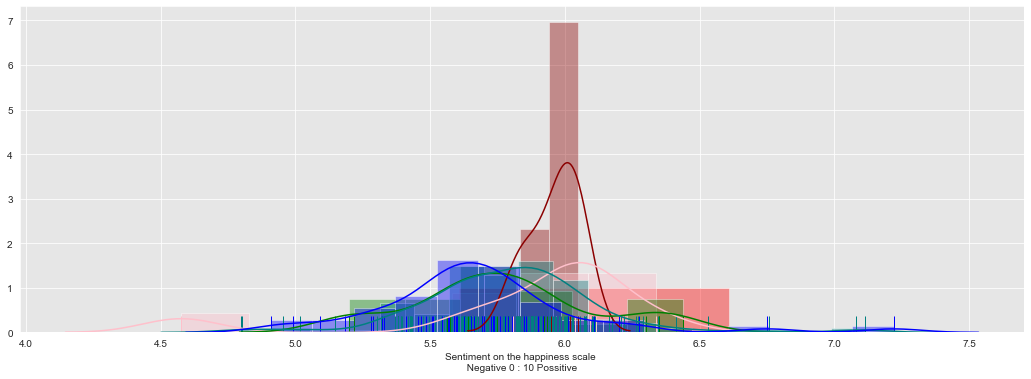

In [67]:
#Plot it as distribution plot
plt.figure(figsize = (18, 6))
colours = ['red', 'darkred', 'pink', 'green', 'teal', 'blue']
for i in range(6):
    sns.distplot(sentiment_layer[i], color = colours[i], \
                 axlabel ="Sentiment on the happiness scale \n Negative 0 : 10 Possitive ", rug = True)
plt.show()

#### 7.4 doggoScore
Instead of just assuming that the further we get from dogsofinstagram, the less content consists of dogs, we develop a doggo_score which can be attached to all nodes in the network. This doggo score consists of how many of the posts contain certain words associated with dogs in either caption or comments.

In [83]:
doggo_words=['🐶','🐾','dog', 'collie', 'pup','aww','bark','woof', 'ruff', 'samoyed',\
             'husky', 'shiba','howl','wiener','golden','retriever', 'bulldog', 'bear', 'bull', 'cute']

def doggo_score(N):
    doggo_scores = {}
    for node in list(N.nodes()):
        d = json.load(open('data/comments/'+node+'_content.txt'))
        tmp=0
        for i in list(d.keys()):
            if d[i]:
                if any(x in d[i].lower() for x in doggo_words):
                    tmp+=1
                else:
                    path='data/comments/comments/'+ i +'_comments.txt'
                    p=json.load(open(path))
                    for j in list(p.keys()):
                        if p[j]:
                            if any(x in p[j].lower() for x in doggo_words):
                                tmp+=1
                                break
        if tmp:
            doggo_scores[node] = tmp/len(list(d.keys()))
        else:
            doggo_scores[node] = 0
    return doggo_scores

#### 7.5 doggoScore evaluation
To evaluate the doggo score, we create a scatterplot with the doggo score and layers to see if there are correlation between how much a user posts dog related content, and their distance to 'dogsofinstagram'.

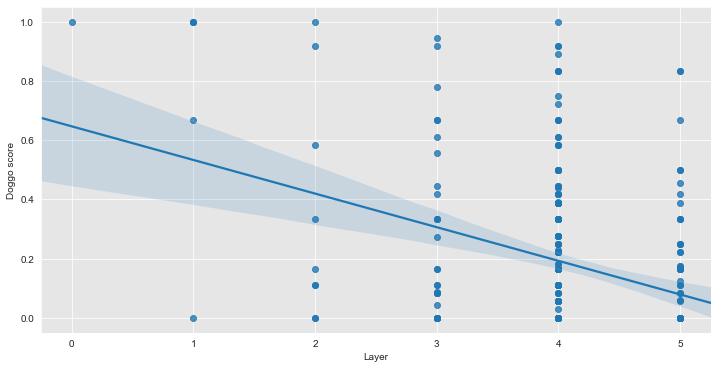

In [86]:
# intialise data of lists. 
ds = doggo_score(G)
data = {'Layer':[layers['layers'][key] for key in layers['layers'] if key in ds],\
        'Doggo score':[ds[key] for key in layers['layers'] if key in layers['layers']]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
plt.figure(figsize = (12, 6))
ax = sns.regplot(x='Layer', y='Doggo score', data=df, fit_reg=True)
ax = sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.show()

#### 7.6 Sentiment evaluation
We create a scatterplot to see is there are correlation between the doggo score and the sentiment of comments recieved.

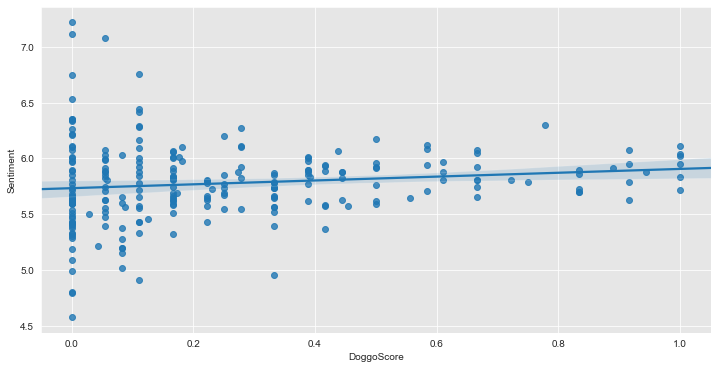

In [87]:
# intialise data of lists. 
data = {'DoggoScore':[ds[key] for key in ds if key in sentiment_dic],\
        'Sentiment':[sentiment_dic[key] for key in sentiment_dic if key in ds]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
plt.figure(figsize = (12, 6))
ax = sns.regplot(x='DoggoScore', y='Sentiment', data=df, fit_reg=True)
ax = sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.show()

In the plot above we can se that the doggo score have a very slightly correlation in a higher sentiment. 

#### 7.7 Wordclouds
To visualise which words have the highest frequency, we create a wordcloud for each of the layers.

In [9]:
#function to assemple the right dataFrame, given a list of comments, sentiments related to the comment 
#and criteria/(below):

def tf(df):
    s = ''
    for comment in df:
        s += comment
    dictionary = {}
    for term in word_tokenize(s):
        
        if term not in stop_words:       
            dictionary[term] = dictionary.get(term, 0) + 1
    l=len(dictionary)
    for term in dictionary.keys():
        dictionary[term] = (dictionary.get(term) / l)
    return dictionary

def createCloud(freq, title = None): #function to plot wordcloud    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=6000,height=2000, max_words=50,\
                          relative_scaling=0.5,normalize_plurals=False)\
                          .generate_from_frequencies(freq)
    # Display the generated image:   
    plt.figure( figsize=(22,5))
    if title:
        plt.title(title)
    plt.axis("off")
    plt.imshow(wordcloud)

In [13]:
segment_of_comments = sentiment_comments(G, return_list = True, segment = True) #GetComments

In [14]:
#indexing in layers
layer_index={}
for key in layers['layers']:
    if key in segment_of_comments:
        if layers['layers'][key] not in layer_index:
            layer_index[layers['layers'][key]]=[]
        layer_index[layers['layers'][key]].append(segment_of_comments[key])

#lists of dictionaries are made for term frequency for each layer
tflst=[]
for i in range(6):
    df = pd.DataFrame({'x':[j for k in layer_index[i] for j in k]} ) 
    tflst.append(tf(df['x']))
    
#doc frequency is made from each of the terms in all of the term frequencies
doc_freq={}
for i in range(6):
    for key in tflst[i]:
        doc_freq[key]=doc_freq.get(key,0)+1
        
#Function to create inverse document frequency from term frequency
def idf(term_freq):
    idf={}
    for key in term_freq:
        idf[key] = term_freq[key] * math.log(6/doc_freq[key])
    return idf

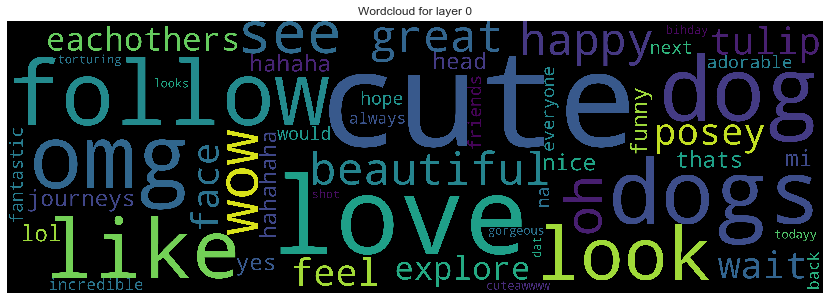

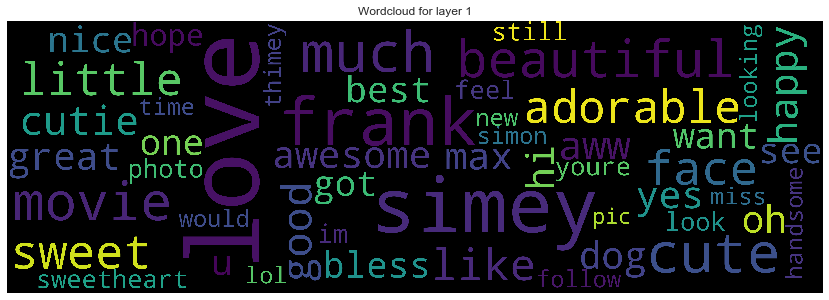

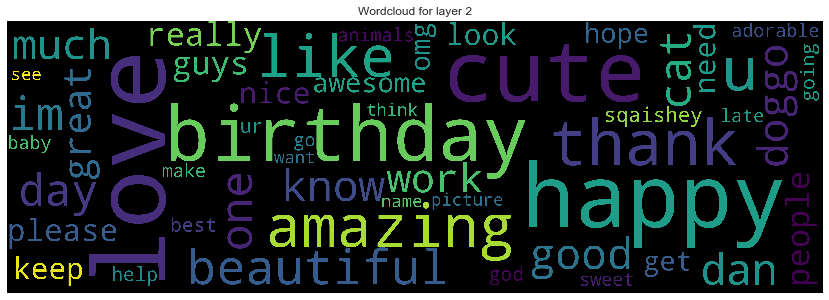

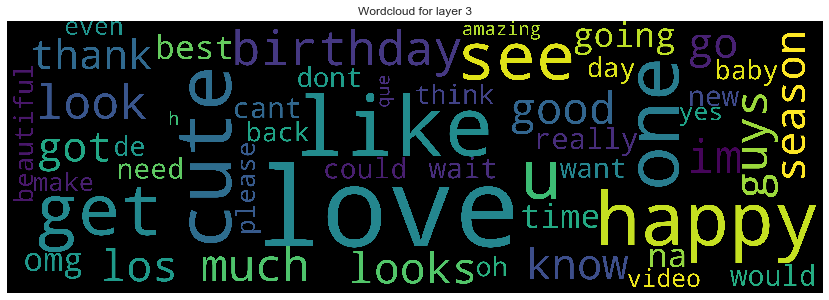

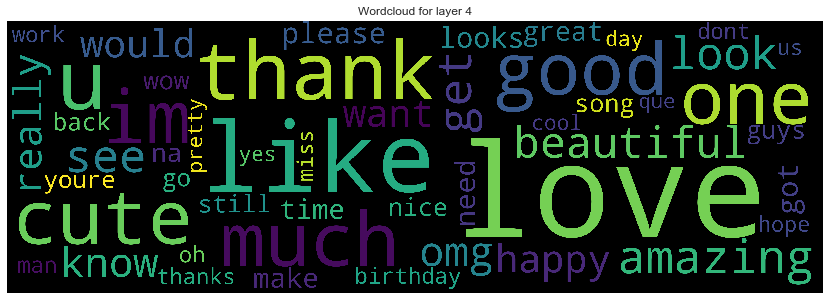

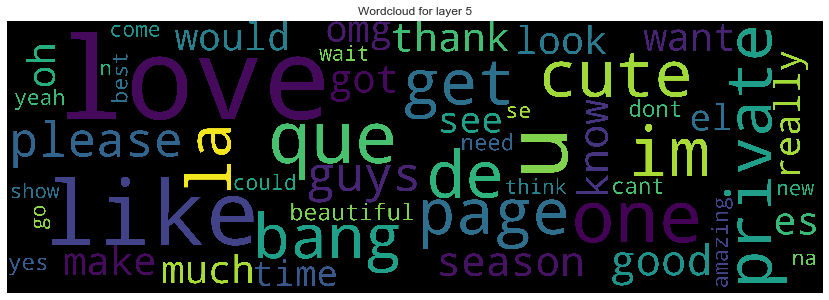

In [92]:
for i in range(6):
    createCloud(tflst[i], 'Wordcloud for layer '+ str(i))

Except for some spanish words, we have some words decreasingly associated with dogs the further from 'dogsofinstagram' we get.\
These plots are made with term frequency and not inverse document frequency. When making the same plots with TF-IDF, the word clouds were filled with gibberish.

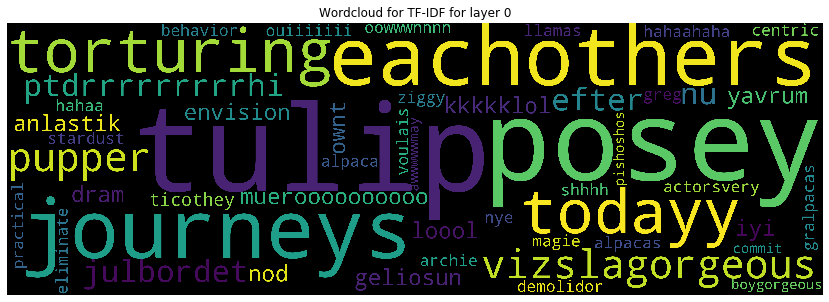

In [15]:
createCloud(idf(tflst[0]), 'Wordcloud for TF-IDF for layer '+ str(0))

### Regarding use of IDF. 
*From the above wordcloud, it becomes clearly visible, why IDF is not useful for this assignment. Words like dogstuff are simply too common that it find very unique slang from insta, at which we are not significantly interested in*

### 8. Discussion
#### 8.1 What went well?

We succeeded to access the dataset and apply the analytics. This was a succes as we were challenged by the API, and its limitations. The fact that we managed to bypass the security settings of the Instagram-server, by building a script that through several users send requests in succession, avoiding IP-bans, and user blocking. However, it took a lot of tries and new users.  

Applying the snowballing data collection allowed us to construct a network of users with different relation to dogs as shown, and with some relevance to the study. Given this was not the core focus on the project. 

It was clearly visible how posts with dog related content decreased as we increased the distance to @dogsOfInstagram.
Our results implicated that there was a slight increase in sentiment in comments given to users as we increased the doggo_score (amount of dog related posts), which we visualized both through plots and wordclouds. While it seems to support the hypothesis of a relation, it is overshadowed by the finding that instagram in general has a high sentiment score slightly above the average sentiment 5.38 to insta_mean ~ 5.68 to High_doggoScore_mean ~ 5.88. We saw however that the deviation in sentiment decreased as doggo_score increased, and that users with high doggo_score would not pass below the instagram sentiment mean. 

Thus all in all the analysis was carried out. 

#### 8.2 What is still missing?

The work did not interpret an entire social network nor complete one, as was neither the goal. It is important to remember that our network is a product of a sampling process and therefore only represents parts of a real network. Because of this, we have chosen not to do any centrality measures of the network, as these would be higly biased by the sampling process. Had we wanted to work with such measures we would have been forced to work on smaller networks, or compare (incomplete networks) between each other, for instance dogs linkage to cats or politics linkage to pets etc. We didn't find a use for it, but linkage via. hashtags, likes or tags, would have been a relevant study, as proposed in our Assignment A. There is certainly a lot more information to be drawn from dog-posters and their interlinked world on instagram. 

In terms of the sentiment analysis, further studies are necessary to confirm the findings, as the relation was significant, but also not as extensive as we might have expected. Analysis of smileys used would probably present a similar strong tool to nltk as instagram unlike twitter and especially concerning dogs, is very void of contextual depth in its textual aspects. 

#### 8.3 What could be improved? Why?

There must be some way to optimize the API usage. We felt that we came far compared to others we found on the internet, however using a very restricted network for analysis was in the first place a risky path for the project. Thats something we learned hindsight as we got entangled in the project. From this the timetable also faced challenges, and the project work got skewed with workload towards the end of the project. Building a network from 20% of the users was not optimal, but the compromise we made. 

In terms of application, several points were mentioned above, and beyond those we feel that there was a lot of powerful tools in the course we didn't find an application for in the specific project, given the data we accumulated. Machine learning tools would have constituted interesting tools to implement as well, but did not fit into the targets of this course.  

### 9. Table of contributions

- Motivation **Anna & Maalthe & Lasse**
- Basic statistic **Anna & Maalthe**
- Tools, theory and analysis **Lasse & Maalthe**
- Scraping **Lasse & Anna**
- Analysis step 1 - network analysis **Anna**
- Sentiment analysis **Lasse & Maalthe**
- Discussion **Anna & Maalthe & Lasse**
- Observable notebook
    - Networks **Anna**
    - The rest **Maalthe & Lasse**